In [23]:
import requests
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Get the data from CryptoAPI

In [138]:
res = requests.get("https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=ILS&apikey=$demo")
data = res.json()
dict_data = data['Time Series (Digital Currency Daily)']

## Working with float as type and Date as type + dropping other columns


In [502]:
features_df = pd.DataFrame.from_dict(dict_data,orient='index')
features_df = features_df[features_df.columns.drop(list(features_df.filter(regex='ILS')))]

features_df.index.name = 'Date'
features_df = features_df.reset_index()
features_df.style.format({"date": lambda t: t.strftime("%d-%m-%Y")}) 
features_df["4b. close (USD)"] = features_df["4b. close (USD)"].astype(float).round(2)
features_df = features_df.drop(columns = ['1b. open (USD)', '2b. high (USD)','5. volume','6. market cap (USD)','3b. low (USD)'])
features_df = features_df.rename(columns = {'4b. close (USD)': 'Close'})
features_df =  features_df[::-1].reset_index()
# features_df = features_df.drop(features_df.index[300:1000])


In [503]:
features_df.head()

,index,Date,Close
0,999,2018-09-27,6689.13
1,998,2018-09-28,6634.58
2,997,2018-09-29,6596.38
3,996,2018-09-30,6626.57
4,995,2018-10-01,6611.61


In [504]:
features_df.tail()

,index,Date,Close
995,4,2021-06-18,35819.84
996,3,2021-06-19,35483.72
997,2,2021-06-20,35600.16
998,1,2021-06-21,31608.93
999,0,2021-06-22,31615.71


# Lets look on the past 100 days

### Trayding days

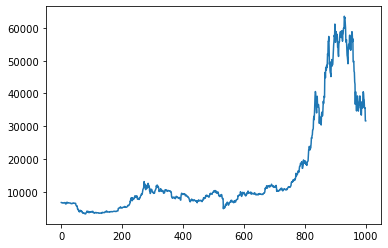

In [505]:

features_df.head()
plt.plot(features_df.head(1000)['Close'])
plt.show()

In [506]:
df = features_df['Close']
df.head()

0    6689.13
1    6634.58
2    6596.38
3    6626.57
4    6611.61
Name: Close, dtype: float64

## Predict n days into the future

In [507]:
future_days = 30

## Create new column (target) shifted n days

In [508]:
features_df['Prediction'] = features_df[['Close']].shift(-future_days)
features_df.head(32)

,index,Date,Close,Prediction
0,999,2018-09-27,6689.13,6505.60
1,998,2018-09-28,6634.58,6489.93
2,997,2018-09-29,6596.38,6344.50
3,996,2018-09-30,6626.57,6330.87
4,995,2018-10-01,6611.61,6371.93
5,994,2018-10-02,6525.79,6410.00
6,993,2018-10-03,6510.00,6433.98
7,992,2018-10-04,6593.79,6387.09
8,991,2018-10-05,6635.65,6485.85
9,990,2018-10-06,6594.27,6468.99


In [509]:
features_df.tail()

,index,Date,Close,Prediction
995,4,2021-06-18,35819.84,NaN
996,3,2021-06-19,35483.72,NaN
997,2,2021-06-20,35600.16,NaN
998,1,2021-06-21,31608.93,NaN
999,0,2021-06-22,31615.71,NaN


## Let's split the data to X & y

In [510]:
X = np.array(features_df.drop(['Prediction','Date'],1))[:-future_days]
print(X)

[[9.990000e+02 6.689130e+03]
 [9.980000e+02 6.634580e+03]
 [9.970000e+02 6.596380e+03]
 ...
 [3.200000e+01 3.725201e+04]
 [3.100000e+01 3.744973e+04]
 [3.000000e+01 3.465525e+04]]


In [511]:
y = np.array(features_df['Prediction'])[:-future_days]
print(y)

[ 6505.6   6489.93  6344.5   6330.87  6371.93  6410.    6433.98  6387.09
  6485.85  6468.99  6519.11  6578.46  6479.84  6419.99  6433.05  6449.81
  6453.07  6457.66  5922.41  5753.4   5655.94  5628.29  5662.    4910.03
  4558.86  4661.07  4370.    4420.61  3932.44  4085.78  3862.2   3875.21
  4264.85  4295.84  4041.32  4190.02  4161.01  3884.01  3951.64  3769.84
  3508.75  3403.55  3410.93  3545.37  3432.88  3380.39  3445.    3302.06
  3224.17  3211.72  3228.67  3509.08  3652.98  3662.22  4049.62  3838.66
  3948.91  3929.71  4008.01  3745.79  3777.74  3567.91  3839.26  3695.32
  3801.91  3702.9   3797.14  3858.56  3766.78  3792.01  3770.96  3987.6
  3975.45  3955.13  3966.65  3585.88  3601.31  3583.13  3476.81  3626.09
  3553.06  3591.84  3616.21  3594.87  3665.3   3539.28  3526.9   3570.93
  3552.82  3569.62  3565.29  3565.25  3550.84  3434.15  3411.04  3458.18
  3434.1   3462.07  3504.77  3458.11  3463.22  3471.59  3405.37  3398.4
  3659.04  3665.18  3680.06  3631.05  3631.46  3609.4

In [512]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Let's create our models

In [513]:
models = {"LinearRegression": LinearRegression(), "DecisionTreeRegressor": DecisionTreeRegressor()}

def model_iteration(models, X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for model,model_exec in models.items():
        model_exec.fit(X_train,y_train)
        model_scores[model] = model_exec.score(X_test,y_test)
    return model_scores
# tree = DecisionTreeRegressor().fit(X_train,y_train)
# lr = LinearRegression().fit(X_train,y_train)


In [514]:
model_score = model_iteration(models,X_train,X_test,y_train,y_test)
model_score



{'LinearRegression': 0.8863824268319387,
 'DecisionTreeRegressor': 0.9918814591745662}

(array([0, 1]),
 [Text(0, 0, 'LinearRegression'), Text(1, 0, 'DecisionTreeRegressor')])

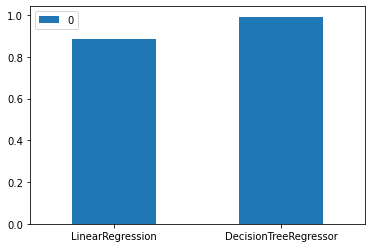

In [515]:
model_score_df = pd.DataFrame.from_dict(model_score,orient='index')
model_score_df.plot.bar()
plt.xticks(rotation=0)

## Create the prediction rows and compare by model

In [516]:
x_future = features_df.drop(['Prediction','Date'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)


# Predction Function

In [517]:
def predict_by_model(model,X_train,y_train):
    np.random.seed(42)
    models = {"LinearRegression": LinearRegression(), "DecisionTreeRegressor": DecisionTreeRegressor()}
    valid = features_df[X.shape[0]:]
    models[model].fit(X_train,y_train)
    predictions = models[model].predict(x_future)
    valid['Prediction'] = predictions
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Days')
    plt.ylabel('Close price USD')
    plt.plot(features_df['Close'])
    plt.plot(valid[['Close','Prediction']])
    plt.legend(['Original','Value','Prediction'])
    plt.show()


# LinearRegression

<ipython-input-517-0bdfa0c71e2c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


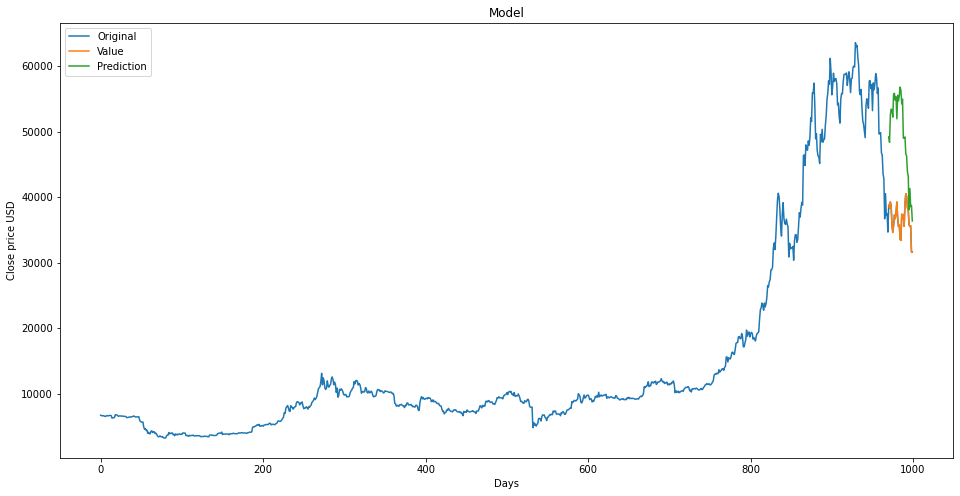

In [518]:
predict_by_model('LinearRegression',X_train,y_train)

# Let's try to do the same with DecisionTreeRegressor

<ipython-input-499-0bdfa0c71e2c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


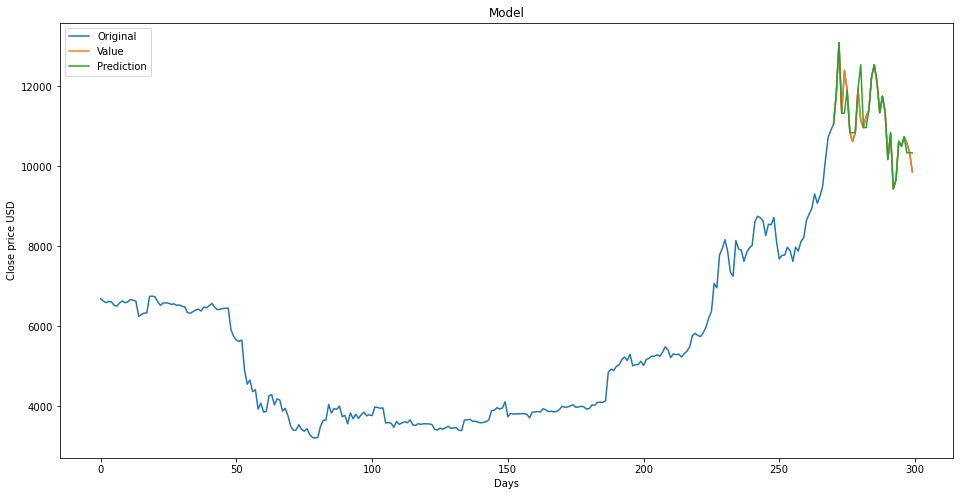

In [501]:
predict_by_model('DecisionTreeRegressor',X_train,y_train)